In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pprint
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

df = pd.read_csv('AUS_Weather.csv')

In [3]:
# Display the first few rows of the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Get a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Get statistical summary of the dataset

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# calculate the percentage of missing values
missing_values = df.isnull().sum() / len(df) * 100

# create a dataframe for better visualization
missing_values_df = pd.DataFrame({'column': missing_values.index,
                                  'percentage': missing_values.values})

# sort the dataframe by percentage in descending order
missing_values_df = missing_values_df.sort_values(by='percentage', ascending=False)

# display the dataframe with horizontal bars using styling
display(missing_values_df.style.background_gradient(subset=['percentage'], cmap='Blues'))

,column,percentage
6,Sunshine,48.009762
5,Evaporation,43.166506
18,Cloud3pm,40.807095
17,Cloud9am,38.421559
15,Pressure9am,10.356799
16,Pressure3pm,10.331363
9,WindDir9am,7.263853
7,WindGustDir,7.098859
8,WindGustSpeed,7.055548
14,Humidity3pm,3.098446


Summary of Unique and Missing values

In [7]:
def column_uniques_and_missing(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns a DataFrame with the number of unique non-null values and
    the count of NaN values for each column in the input DataFrame.
    """
    # Count unique non-null values per column
    unique_counts = df.nunique(dropna=False)

    # Count missing values per column
    missing_counts = df.isnull().sum()

    # Combine into a summary DataFrame
    summary = pd.DataFrame({
        'unique_values': unique_counts,
        'missing_values': missing_counts
    })
    summary.index.name = 'column'

    # Print or return the summary for inspection
    return summary

# Example usage with your dataset:
data_path = 'AUS_Weather.csv'
df = pd.read_csv(data_path)
summary_df = column_uniques_and_missing(df)
summary_df

,unique_values,missing_values
column,,
Date,3436,0
Location,49,0
MinTemp,390,1485
MaxTemp,506,1261
Rainfall,682,3261
Evaporation,359,62790
Sunshine,146,69835
WindGustDir,17,10326
WindGustSpeed,68,10263


In [8]:
# Total NaN values across the entire DataFrame
total_nan_count = df.isnull().sum().sum() # .isnull().sum() gives null per column

# .isnull().sum().sum() gives absolute total across dataframe
print(f"\nTotal NaN values in the dataset: {total_nan_count}")


Total NaN values in the dataset: 343248


Seperating categorical and numerical columns

In [9]:
# find categorical columns
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical columns\n'.format(len(categorical)))

print('The categorical columns are :', categorical)

There are 7 categorical columns

The categorical columns are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
df[categorical].head()

column,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [11]:
# check missing values in categorical variables

df[categorical].isnull().sum()

column
Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

View frequency of categorical variables

In [12]:
for var in categorical:

    print(df[var].value_counts())

Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarb

View frequency distribution of categorical variables (in percentage)

In [13]:
for var in categorical:

    print(df[var].value_counts()/float(len(df)))

Date
2017-06-24    0.000337
2017-06-23    0.000337
2017-06-22    0.000337
2017-06-21    0.000337
2017-06-20    0.000337
                ...   
2008-01-27    0.000007
2008-01-28    0.000007
2008-01-29    0.000007
2008-01-30    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Adelaide            0.021951
Darwin              0.021951
Hobart              0.021951
Perth               0.021951
Melbourne           0.021951
Brisbane            0.021951
Albury              0.020899
MountGinini         0.020899
GoldCoast           0.020899
Wollongong          0.020899
MountGambier        0.020899
Launceston          0.020899
AliceSprings        0.020899
Albany              0.020899
Townsville          0.020899
Bendigo             0.020899
Cairns              0.020899
Ballarat            0.020899
Penrith             0.020892
Newcastle           0.020892
Tuggeranong         0.020892
PerthAirport        0.02

Number of labels: cardinality:

* The number of labels within a categorical variable is known as cardinality.
* A high number of labels within a variable is known as high cardinality.
* High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

But what are these problems due to Cardinality ?
* Increased Memory Usage: Each unique category requires memory to store and process, and with high cardinality, this can lead to excessive memory consumption, especially with large datasets.
* Increased Training Time: Models need to process a larger number of features when dealing with high cardinality after techniques like one-hot encoding. This can significantly increase the training time.
* Increased Risk of Overfitting: High cardinality can lead to a large number of features, which can make the model too complex and cause it to overfit to the training data, performing poorly on unseen data.
* Sparse Data: One-hot encoding a high cardinality feature results in a large number of columns with mostly zero values, leading to sparse data. This can be challenging for some algorithms and might require specific handling.
*Reduced Interpretability: Models with a large number of features due to high cardinality can be harder to interpret and understand, making it difficult to explain the model's predictions.

Check for cardinality in categorical variables

In [14]:
for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


In [15]:
# Firstly , we know that RainTomorrow is the Target label
# so let us clean this first and then move to input features

df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Checking NaN values 

In [17]:
count_dist = df['RainTomorrow'].value_counts(dropna=False)

print(count_dist)

# NaN values are 3267 which needs to be removed.

RainTomorrow
No     110316
Yes     31877
NaN      3267
Name: count, dtype: int64


Removing NaN values

In [18]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [19]:
count_dist = df['RainTomorrow'].value_counts(dropna=False)

print(count_dist)

# Nan values have been removed

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


* We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.
* All the other variables contain relatively smaller number of variables.

Feature Engineering of Date Variable :

In [20]:
df['Date'].dtypes
# this is object datatype, needs to converted to datetime

dtype('O')

In [21]:
# Convert 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])
print("After conversion:")
print(df["Date"].dtype)

After conversion:
datetime64[ns]


In [22]:
# extract year, month and Day from date

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [23]:
# We can see that there are three additional columns created from Date variable.
# Now, I will drop the original Date variable from the dataset.


df.drop('Date', axis=1, inplace = True)

In [24]:
# Now, we can see that the Date variable has been removed from the dataset.

# Explore Categorical Variables

# Now, I will explore the categorical variables one by one.

# find categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [25]:
# check for missing values in categorical variables

df[categorical].isnull().sum()

column
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

* We can see that WindGustDir, WindDir9am, WindDir3pm, RainToday variables contain missing values. 
* We will explore these variables one by one.

In [26]:
# Explore Location variable

# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [27]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

<Axes: ylabel='Location'>

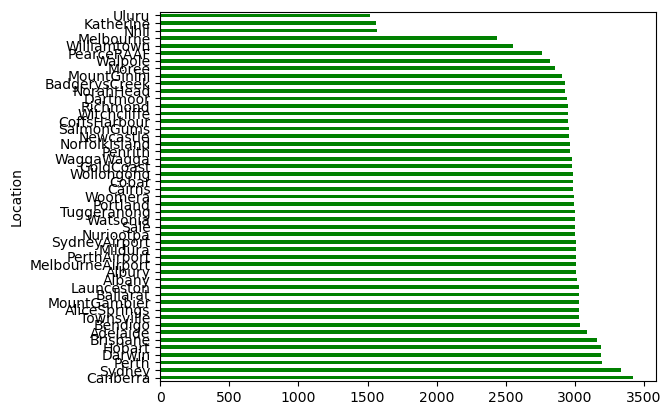

In [28]:
# check frequency distribution of values in Location variable

df.Location.value_counts().plot(kind = 'barh', color='green')

One-hot Encoding

In [29]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


* The code snippet pd.get_dummies(df.Location, drop_first=True).head() performs the following actions:
* pd.get_dummies(df.Location, ...): This is a pandas function that converts the categorical variable df.Location into dummy or indicator variables.
* For each unique location in the 'Location' column, it creates a new column. drop_first=True: This argument is used to drop the first category of the 'Location' variable.
* This is often done to avoid multicollinearity when using these dummy variables in a statistical model. By dropping the first category, the remaining categories can be interpreted in comparison to the dropped one.
* .head(): This method is called on the resulting DataFrame of dummy variables to display only the first 5 rows. This gives you a preview of what the one-hot encoded data looks like.
* In essence, this code is performing one-hot encoding on the 'Location' column, creating a new binary column for each location (except for one, which is dropped), and then showing you the beginning of this new set of columns.

In [30]:
# Explore WindGustDir variable

# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [31]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [32]:
# the above column too contains nan that needs to be removed
df.dropna(subset=['WindGustDir'], inplace=True)

In [33]:
df['WindGustDir'].isnull().sum()

np.int64(0)

In [34]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [35]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7992
ESE    7305
N      9033
NE     7060
NNE    6433
NNW    6561
NW     8003
S      8949
SE     9309
SSE    8993
SSW    8610
SW     8797
W      9780
WNW    8066
WSW    8901
NaN       0
dtype: int64

In [36]:
# We can see that there are 9330 missing values in WindGustDir variable.
# Explore WindDir9am variable
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [37]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [38]:
# the above column too contains nan that needs to be removed
df.dropna(subset=['WindDir9am'], inplace=True)

In [39]:
df['WindDir9am'].isnull().sum()

np.int64(0)

In [40]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7506
ESE     7310
N      10935
NE      7040
NNE     7703
NNW     7470
NW      7526
S       8149
SE      8530
SSE     8754
SSW     7149
SW      7729
W       7501
WNW     6845
WSW     6530
NaN        0
dtype: int64

In [42]:
# We can see that there are 10013 missing values in the WindDir9am variable.
# Explore WindDir3pm variable

# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [43]:
# the above column too contains nan that needs to be removed
df.dropna(subset=['WindDir3pm'], inplace=True)

In [44]:
df['WindDir3pm'].isnull().sum()

np.int64(0)

In [45]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [46]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7117
ESE    7566
N      7862
NE     7168
NNE    5882
NNW    6883
NW     7312
S      8843
SE     9014
SSE    8483
SSW    7359
SW     8267
W      9056
WNW    7972
WSW    8452
NaN       0
dtype: int64

In [47]:
# There are 3778 missing values in the WindDir3pm variable.
# Explore RainToday variable

# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [48]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

* The above column contains nan that needs to be removed

In [49]:
df.dropna(subset = ['RainToday'], inplace = True)
df['RainToday'].isnull().sum()

np.int64(0)

In [50]:
import plotly.express as px

# Calculate value counts
rain_today_counts = df['RainToday'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(
    rain_today_counts,
    values=rain_today_counts.values,
    names=rain_today_counts.index,
    title='Distribution of RainToday'
)

# Display the chart
fig.show()

One Hot Encoding of RainToday variable

In [51]:
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [52]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    27756
NaN        0
dtype: int64

In [53]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    27756
NaN        0
dtype: int64

* pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0).
* pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True): This part performs one-hot encoding on the 'RainToday' column.
* df.RainToday: Selects the 'RainToday' column from your DataFrame. drop_first=True: This creates dummy variables for each unique value in 'RainToday' but drops the first category to avoid multicollinearity.
* dummy_na=True: This is important! It creates an additional dummy variable specifically for the missing (NaN) values in the 'RainToday' column.
* .sum(axis=0): This part takes the resulting DataFrame of dummy variables and calculates the sum of values along each column (axis=0). Since the dummy variables are binary (0 or 1), summing along the column essentially counts the number of occurrences of each category, including the missing values.
* In summary, this code snippet one-hot encodes the 'RainToday' column, including a separate category for missing values, and then counts how many times each category (including missing) appears in the dataset. This gives you a quick way to see the distribution of values in the 'RainToday' column, including the count of missing entries after one-hot encoding.

In [54]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [55]:
# view the numerical variables

df[numerical].head()

column,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


Summary of numerical variables:

* There are 16 numerical variables. These are given by MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am and Temp3pm. All of the numerical variables are of continuous type.
* Explore problems within numerical variables
* Now, I will explore the numerical variables.
* Missing values in numerical variables

In [56]:
# check missing values in numerical variables

df[numerical].isnull().sum()

column
MinTemp             90
MaxTemp             45
Rainfall             0
Evaporation      50647
Sunshine         56623
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am       1012
Humidity3pm       1522
Pressure9am       9120
Pressure3pm       9069
Cloud9am         46234
Cloud3pm         48233
Temp9am            343
Temp3pm            795
Year                 0
Month                0
Day                  0
dtype: int64

In [57]:
# check missing values in numerical variables
missing_numerical = df[numerical].isnull().sum()

# calculate percentage of missing values
missing_numerical_percentage = (missing_numerical / len(df) * 100).sort_values(ascending=False)

# create a dataframe for visualization
missing_numerical_df = pd.DataFrame({
    'Missing Count': missing_numerical[missing_numerical_percentage.index],
    'Percentage': missing_numerical_percentage
})

# display with horizontal bars using styling
display(missing_numerical_df.style.background_gradient(subset=['Percentage'], cmap='Blues'))

,Missing Count,Percentage
column,,
Sunshine,56623,45.770754
Evaporation,50647,40.940102
Cloud3pm,48233,38.988764
Cloud9am,46234,37.372888
Pressure9am,9120,7.372080
Pressure3pm,9069,7.330854
Humidity3pm,1522,1.230297
Humidity9am,1012,0.818042
Temp3pm,795,0.642632


In [58]:
# We can see that all the 16 numerical variables contain missing values.
# Outliers in numerical variables
# view summary statistics in numerical variables

df[numerical].describe()

column,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,123620.000000,123665.000000,123710.000000,73063.000000,67087.000000,123710.000000,123710.000000,123710.000000,122698.000000,122188.000000,114590.000000,114641.000000,77476.000000,75477.000000,123367.000000,122915.000000,123710.000000,123710.000000,123710.000000
mean,12.414077,23.474900,2.375661,5.609501,7.718384,40.685280,15.011689,19.174578,67.654281,50.848406,1017.398144,1015.011596,4.407404,4.491408,17.269634,21.897078,2012.806111,6.431824,15.709781
std,6.369106,7.207207,8.528039,4.222329,3.777496,13.388636,8.307285,8.571039,19.053274,20.968818,7.029441,6.963621,2.882191,2.720287,6.486865,7.028465,2.528473,3.475113,8.788908
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.800000,18.100000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.800000,1010.300000,1.000000,2.000000,12.500000,16.700000,2011.000000,3.000000,8.000000
50%,12.200000,23.000000,0.000000,4.800000,8.600000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.400000,1015.000000,5.000000,5.000000,16.900000,21.400000,2013.000000,6.000000,16.000000
75%,17.100000,28.600000,0.800000,7.600000,10.700000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.100000,1019.700000,7.000000,7.000000,21.900000,26.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


Missing Values: 
* The count row shows that many numerical columns have a significant number of missing values, as we saw in the previous visualizations.
* Columns like Sunshine, Evaporation, Cloud9am, and Cloud3pm have considerably fewer counts than the total number of rows (145460), indicating a high percentage of missing data.
* Range of Values: The min and max rows give you the range of values for each numerical variable. This can help identify potential outliers or data entry errors. For example, Rainfall has a maximum value of 371.0, which seems quite high compared to the 75th percentile of 0.8, suggesting the presence of outliers.
* Distribution (Mean vs. Median): Comparing the mean and 50% (median) values can give you an idea of the distribution of the data. If the mean and median are significantly different, it might indicate a skewed distribution.
* For instance, the mean of Rainfall (2.36) is much higher than its median (0.0), confirming a heavily skewed distribution with many days having no rain and a few days with very high rainfall.
* Variability (Standard Deviation): The std row shows the standard deviation, which measures the spread or variability of the data. A higher standard deviation indicates greater variability in the values of a variable.
* On closer inspection, we can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'WindSpeed3pm')

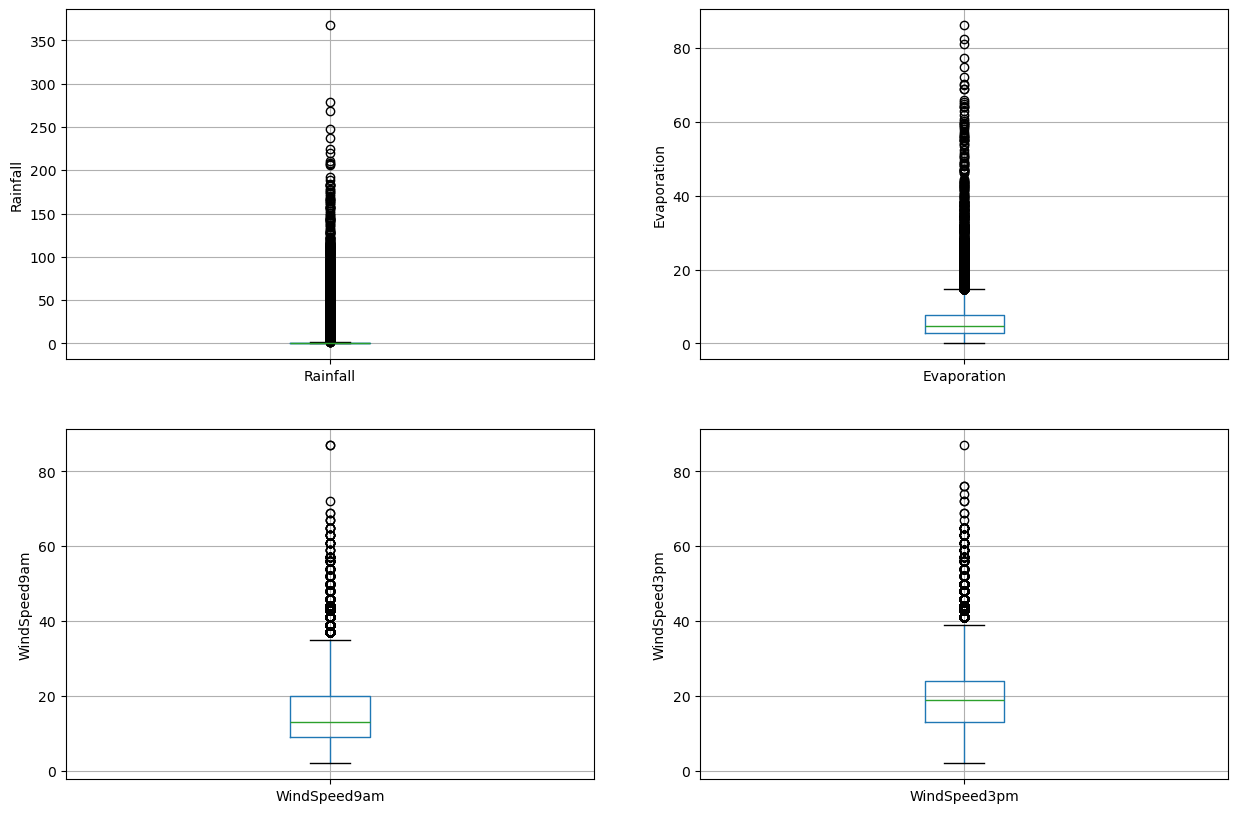

In [59]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Rainfall: 
* The boxplot for Rainfall shows a large number of points far above the upper whisker. This indicates a **significant number of outliers with high rainfall values**. The majority of the data is concentrated near zero, as expected for rainfall data.

Evaporation: 
* The boxplot for Evaporation also shows several points above the upper whisker, indicating **outliers with unusually high evaporation rates**. The distribution appears less skewed than Rainfall, but outliers are present.

WindSpeed9am and WindSpeed3pm: 
* Both wind speed variables show outliers above the upper whisker. This suggests there were instances of **unusually high wind speeds recorded at both 9 am and 3 pm**. The spread of the main body of the data (within the box and whiskers) seems more symmetrical compared to Rainfall and Evaporation.

In summary, all four variables show the presence of outliers, with Rainfall exhibiting the most extreme ones. These outliers should be considered when preparing the data for modeling, as they can sometimes disproportionately influence certain algorithms.

Check the distribution of variables:

* Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range)

Text(0, 0.5, 'RainTomorrow')

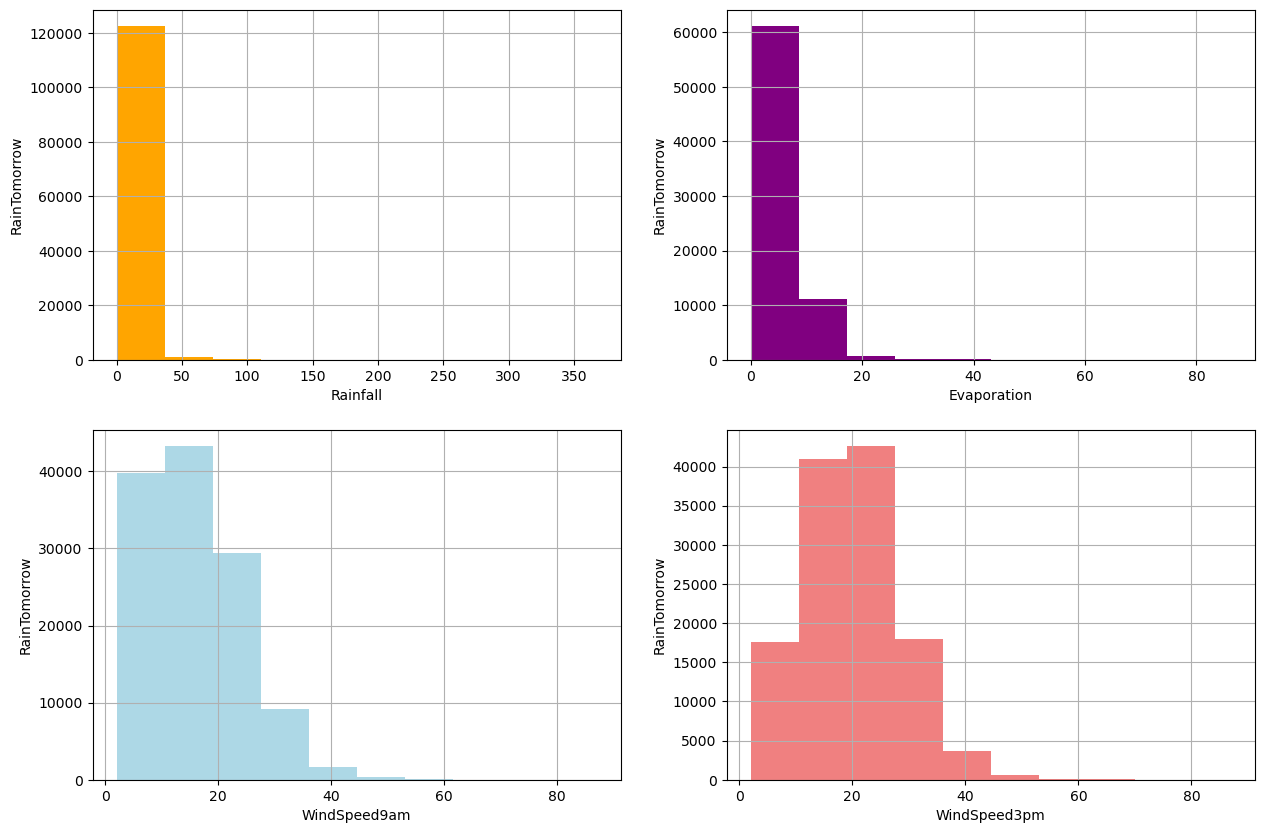

In [60]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10, color='orange')
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10, color='purple')
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10, color='lightblue')
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10, color='lightcoral')
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

Based on the histograms of 'Rainfall', 'Evaporation', 'WindSpeed9am', and 'WindSpeed3pm', here are some inferences:

1. Rainfall: 
    * The histogram for Rainfall is **highly skewed to the right**. A very large number of observations have zero or very low rainfall, with a long tail extending towards higher rainfall values. This is consistent with the boxplot and the nature of rainfall data, where heavy rain events are less frequent but can have high values.

2. Evaporation: 
    * The histogram for Evaporation is also **skewed to the right**, although less severely than Rainfall. Most values are concentrated at the lower end, with fewer occurrences of high evaporation rates.

3. WindSpeed9am and WindSpeed3pm: 
    * The histograms for both WindSpeed9am and WindSpeed3pm appear to be more **symmetrical** and somewhat resemble a **normal distribution**, although there might be a slight skew to the right. The majority of the wind speed values are clustered around the lower to middle range, with fewer instances of very high wind speeds (which were identified as outliers in the boxplots).

In summary, the histograms confirm the **skewed nature of Rainfall and Evaporation**, while the **wind speed variables** show distributions that are **closer to normal but still exhibit some right skew**. This information about the distribution of these numerical variables is important for choosing appropriate data preprocessing techniques and modeling algorithms.

Using interquantile range to find outliers

In [61]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


Inferences from the output:

* The output you received is: Rainfall outliers are **values < -2.4000000000000004 or > 3.2**.
* Lower Fence: 
    * The lower fence is calculated as approximately **-2.4**. Since rainfall cannot be negative, this lower fence **isn't practically useful** for identifying outliers in this context. It simply indicates that there are no outliers on the lower end of the distribution based on this method.

* Upper Fence: 
    * The upper fence is calculated as **3.2**. This means any rainfall value greater than **3.2 mm** is considered an outlier according to the IQR method with a multiplier of 3.

This confirms what we saw in the boxplot – there are many data points above this value, indicating frequent occurrences of **higher rainfall** amounts that are statistically identified as outliers relative to the majority of the data.

This method helps to quantify what values are considered extreme in the 'Rainfall' distribution.

In [62]:
# For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.599999999999998 or > 22.0


* For Evaporation, the minimum and maximum values are **0.0** and **145.0**.
* So, the outliers are **values > 21.8**.

In [63]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -24.0 or > 53.0


* WindSpeed9am outliers are **values < -29.0 or > 55.0**
* For WindSpeed9am, the minimum and maximum values are **0.0** and **130.0**.
*  So, the outliers are **values > 55.0**.

In [64]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'
      .format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


* WindSpeed3pm outliers are **values < -20.0 or > 57.0**
* For WindSpeed3pm, the minimum and maximum values are **0.0** and **87.0**.
* So, the outliers are **values > 57.0**.

In [65]:
# Declare feature vector and target variable

X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

Train-test split

In [66]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

* X: 
    * This is your feature dataset (the independent variables).

* y: 
    * This is your target variable (the dependent variable you want to predict). 
* test_size = 0.2: 
    * This argument specifies the proportion of the dataset that should be allocated to the testing set. In this case, 20% of the data will be used for testing, and the remaining 80% will be used for training.

* random_state = 0: 
    * This argument is used to set a seed for the random number generator. Setting a random_state ensures that the split is the same every time you run the code. This is important for reproducibility, as it allows you to get the same training and testing sets consistently.

In [67]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((98968, 24), (24742, 24))

Feature Engineering:
* Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.
* First, I will display the categorical and numerical variables again separately.

In [68]:
# check data types in X_train

X_train.dtypes

column
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [69]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [70]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [71]:
# Engineering missing values in numerical variables

# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

column
MinTemp             75
MaxTemp             38
Rainfall             0
Evaporation      40502
Sunshine         45256
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am        794
Humidity3pm       1185
Pressure9am       7317
Pressure3pm       7277
Cloud9am         37036
Cloud3pm         38682
Temp9am            265
Temp3pm            622
Year                 0
Month                0
Day                  0
dtype: int64

In [72]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

column
MinTemp             15
MaxTemp              7
Rainfall             0
Evaporation      10145
Sunshine         11367
WindGustSpeed        0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am        218
Humidity3pm        337
Pressure9am       1803
Pressure3pm       1792
Cloud9am          9198
Cloud3pm          9551
Temp9am             78
Temp3pm            173
Year                 0
Month                0
Day                  0
dtype: int64

In [73]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col,": ", round(X_train[col].isnull().mean(),4))

MinTemp :  0.0008
MaxTemp :  0.0004
Evaporation :  0.4092
Sunshine :  0.4573
Humidity9am :  0.008
Humidity3pm :  0.012
Pressure9am :  0.0739
Pressure3pm :  0.0735
Cloud9am :  0.3742
Cloud3pm :  0.3909
Temp9am :  0.0027
Temp3pm :  0.0063


* for col in numerical:: 
    * This loop iterates through each column name stored in the numerical list. The numerical list contains the names of all the numerical columns in your DataFrame.
* if X_train[col].isnull().mean()>0:: 
    * Inside the loop, for each col (numerical column name), this condition checks if that column in the X_train DataFrame contains any missing values. 
* X_train[col].isnull(): 
    * This creates a boolean Series (True/False) indicating whether each value in the column is missing (True) or not (False).
* .mean(): 
    * This calculates the mean of the boolean Series. Since True is treated as 1 and False as 0, the mean represents the proportion or percentage of missing values in the column.
* 0: 
    * This checks if the mean (percentage of missing values) is greater than 0. The code inside the if block will only execute if the column has at least one missing value.
* print(col, round(X_train[col].isnull().mean(),4)): 
    * If the condition in the if statement is true (i.e., there are missing values in the column), this line prints the column name and the percentage of missing values.
* col: 
    * Prints the name of the numerical column. round(X_train[col].isnull().mean(),4): Calculates the mean of the boolean Series (percentage of missing values) again and rounds it to 4 decimal places for better readability.

In essence, this code snippet efficiently identifies numerical columns with missing values in your training set and prints the percentage of missing data

Assumption:
* I assume that the data are missing completely at random (MCAR).
* There are two methods which can be used to impute missing values. 
    * One is mean or median imputation 
    * other one is random sample imputation.
* When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.
* I will impute missing values with the appropriate statistical measures of the data, in this case median.
* Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only.

This is to avoid overfitting.

In [74]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

The list of DataFrames to process

* for df1 in [X_train, X_test]:: 
    * This is the outer loop. It's an elegant way to apply the same set of operations to multiple DataFrames without writing the code twice. In the first iteration, the variable df1 will refer to your X_train DataFrame. In the second iteration, df1 will refer to your X_test DataFrame.
* Loop through each numerical column name for col in numerical:
* for col in numerical:: 
    * This is the inner loop. It iterates through a predefined list called numerical, which presumably contains the names of all the columns you want to impute (e.g., ['age', 'salary', 'experience_years']). In each iteration of this inner loop, the variable col will hold one column name as a string (e.g., first 'age', then 'salary', etc.).
* Calculate the median ONLY from the training data col_median = X_train[col].median()
* col_median = X_train[col].median(): 
    * This is the most critical line. X_train[col]: It selects the current column (e.g., the 'age' column) but specifically and always from X_train. .median(): It calculates the median value of that column. The median is the middle value when the data is sorted, which makes it robust to outliers (unlike the mean). This calculated median is stored in the col_median variable. Notice that even when the outer loop is processing X_test, the median is still calculated from X_train.
* Fill missing values in the current DataFrame (df1) with the calculated median df1[col].fillna(col_median, inplace=True)
* df1[col].fillna(col_median, inplace=True): 
    * This line performs the actual imputation. df1[col]: Selects the current column (col) from the current DataFrame (df1). Remember, df1 could be X_train or X_test. .fillna(col_median): This is a pandas function that finds all the missing values (NaN) in the selected series and replaces them with the value of col_median. inplace=True: This argument modifies the DataFrame df1 directly in memory. Without it (inplace=False, the default), the operation would return a new series with the values filled, and you would need to assign it back, like this: df1[col] = df1[col].fillna(col_median). The inplace=True version is just a more concise way to write it.

In [75]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

column
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [76]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

column
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

* Now, we can see that there are no missing values in the numerical columns of training and test set.

In [77]:
# Engineering missing values in categorical variables

# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().sum()

column
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [78]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [79]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [80]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

column
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [81]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

column
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [82]:
# As a final check, I will check for missing values in X_train and X_test.

# check missing values in X_train

X_train.isnull().sum()


column
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [83]:
# check missing values in X_test

X_test.isnull().sum()

# We can see that there are no missing values in X_train and X_test.

# Engineering outliers in numerical variables
# We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns
#  contain outliers. I will use top-coding approach to cap maximum values
#  and remove outliers from the above variables.

column
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [84]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [85]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [86]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [87]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [88]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [89]:
X_train[numerical].describe()

column,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000
mean,12.411637,23.470567,0.684285,5.282155,8.122695,40.704248,15.021785,19.171783,67.636792,50.857035,1017.404220,1015.020984,4.630557,4.692082,17.263373,21.886507,2012.805321,6.432473,15.723325
std,6.367432,7.203128,1.190780,2.891988,2.817394,13.388986,8.280499,8.556838,18.976405,20.872878,6.761944,6.704011,2.297788,2.137608,6.477587,7.004978,2.526851,3.477640,8.793135
min,-8.200000,-4.100000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.000000,-5.100000,2007.000000,1.000000,1.000000
25%,7.800000,18.100000,0.000000,4.200000,8.100000,31.000000,9.000000,13.000000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000,2011.000000,3.000000,8.000000
50%,12.200000,23.000000,0.000000,4.900000,8.600000,39.000000,13.000000,19.000000,69.000000,51.000000,1017.400000,1015.000000,5.000000,5.000000,16.900000,21.400000,2013.000000,6.000000,16.000000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [90]:
# We can now see that the outliers in Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns are capped.

# Encode categorical variables

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [91]:
X_train[categorical].head()

column,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
29839,Richmond,S,N,WNW,No
54929,MountGinini,ENE,ENE,NE,No
32098,Sydney,WSW,NW,WSW,No
130526,Hobart,SSW,NNW,SSW,Yes
45522,Wollongong,N,N,N,No


In [92]:
# encode RainToday variable
# %pip install category_encoders

# import category_encoders as ce

# encoder = ce.BinaryEncoder(cols=['RainToday'])

# X_train = encoder.fit_transform(X_train)

# X_test = encoder.transform(X_test)

# RainToday variable is already encoded as 'RainToday_0' and 'RainToday_1' in X_train and X_test.
# No further encoding is needed here.

In [93]:
X_train.head()

column,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
29839,Richmond,2.3,14.2,0.0,4.9,8.6,S,50.0,N,WNW,...,1016.3,1012.6,5.0,5.0,6.1,12.5,No,2016,7,24
54929,MountGinini,7.1,16.1,0.0,4.9,8.6,ENE,31.0,ENE,NE,...,1017.4,1015.0,5.0,5.0,9.1,14.9,No,2017,1,4
32098,Sydney,10.9,19.9,0.0,4.2,8.5,WSW,44.0,NW,WSW,...,1013.6,1012.2,6.0,5.0,14.0,18.0,No,2013,8,4
130526,Hobart,5.9,12.3,3.2,1.2,8.6,SSW,37.0,NNW,SSW,...,1022.5,1021.7,6.0,5.0,7.6,10.0,Yes,2010,5,20
45522,Wollongong,17.8,23.3,0.0,4.9,8.6,N,31.0,N,N,...,1025.7,1022.6,7.0,8.0,19.6,20.8,No,2017,4,22


We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the X_train training set.

In [94]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

KeyError: "None of [Index(['RainToday_0', 'RainToday_1'], dtype='object', name='column')] are in the [columns]"

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
29839,2.3,14.2,0.0,4.9,8.6,50.0,6.0,20.0,81.0,44.0,...,False,False,False,False,False,False,False,False,True,False
54929,7.1,16.1,0.0,4.9,8.6,31.0,15.0,15.0,97.0,72.0,...,False,False,False,False,False,False,False,False,False,False
32098,10.9,19.9,0.0,4.2,8.5,44.0,9.0,24.0,54.0,29.0,...,False,False,False,False,False,False,False,False,False,True
130526,5.9,12.3,3.2,1.2,8.6,37.0,13.0,15.0,84.0,73.0,...,False,False,False,False,False,True,False,False,False,False
45522,17.8,23.3,0.0,4.9,8.6,31.0,9.0,15.0,78.0,77.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Similarly, I will create the X_test testing set.

X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [ ]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
27495,17.0,32.3,0.0,1.3,8.6,30.0,9.0,11.0,75.0,39.0,...,False,False,False,False,False,False,False,False,False,False
137648,3.5,19.1,0.0,3.0,3.3,33.0,2.0,9.0,45.0,21.0,...,False,False,False,False,False,False,False,False,False,False
40163,6.2,22.0,0.0,5.0,9.8,50.0,31.0,28.0,48.0,32.0,...,False,False,False,False,False,False,False,False,True,False
84026,7.5,22.9,0.0,3.4,9.0,30.0,6.0,15.0,60.0,45.0,...,False,False,False,False,False,False,False,False,False,False
48755,6.5,14.1,2.0,4.9,8.6,54.0,31.0,35.0,83.0,75.0,...,False,True,False,False,False,False,False,False,False,False


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling. I will do it as follows.

Scale Features

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,...,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000
mean,12.411637,23.470567,0.684285,5.282155,8.122695,40.704248,15.021785,19.171783,67.636792,50.857035,...,1015.020984,4.630557,4.692082,17.263373,21.886507,2012.805321,6.432473,15.723325,0.224163,0.775837
std,6.367432,7.203128,1.190780,2.891988,2.817394,13.388986,8.280499,8.556838,18.976405,20.872878,...,6.704011,2.297788,2.137608,6.477587,7.004978,2.526851,3.477640,8.793135,0.417032,0.417032
min,-8.200000,-4.100000,0.000000,0.000000,0.000000,7.000000,2.000000,2.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.000000,-5.100000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.800000,18.100000,0.000000,4.200000,8.100000,31.000000,9.000000,13.000000,56.000000,36.000000,...,1010.700000,3.000000,4.000000,12.500000,16.800000,2011.000000,3.000000,8.000000,0.000000,1.000000
50%,12.200000,23.000000,0.000000,4.900000,8.600000,39.000000,13.000000,19.000000,69.000000,51.000000,...,1015.000000,5.000000,5.000000,16.900000,21.400000,2013.000000,6.000000,16.000000,0.000000,1.000000
75%,17.000000,28.600000,0.800000,5.600000,9.000000,48.000000,20.000000,24.000000,81.000000,65.000000,...,1019.300000,6.000000,6.000000,21.900000,26.700000,2015.000000,9.000000,23.000000,0.000000,1.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1039.600000,9.000000,9.000000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.249406,0.350575,0.0,0.224771,0.593103,0.335938,0.075472,0.327273,0.81,0.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.363420,0.386973,0.0,0.224771,0.593103,0.187500,0.245283,0.236364,0.97,0.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.453682,0.459770,0.0,0.192661,0.586207,0.289062,0.132075,0.400000,0.54,0.29,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.334917,0.314176,1.0,0.055046,0.593103,0.234375,0.207547,0.236364,0.84,0.73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.617577,0.524904,0.0,0.224771,0.593103,0.187500,0.132075,0.236364,0.78,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.598575,0.697318,0.000,0.059633,0.593103,0.179688,0.132075,0.163636,0.75,0.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.277910,0.444444,0.000,0.137615,0.227586,0.203125,0.000000,0.127273,0.45,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.342043,0.500000,0.000,0.229358,0.675862,0.335938,0.547170,0.472727,0.48,0.32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.372922,0.517241,0.000,0.155963,0.620690,0.179688,0.075472,0.236364,0.60,0.45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.349169,0.348659,0.625,0.224771,0.593103,0.367188,0.547170,0.600000,0.83,0.75,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.describe()
# We now have X_train dataset ready to be fed into the Logistic Regression classifier.
# I will do it as follows.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,...,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000,98968.000000
mean,0.489588,0.528172,0.213839,0.242301,0.560186,0.263314,0.245694,0.312214,0.676368,0.508570,...,0.054967,0.058383,0.070609,0.072690,0.068366,0.059262,0.066577,0.072488,0.063667,0.067800
std,0.151245,0.137991,0.372119,0.132660,0.194303,0.104601,0.156236,0.155579,0.189764,0.208729,...,0.227918,0.234467,0.256171,0.259629,0.252373,0.236115,0.249289,0.259296,0.244160,0.251403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380048,0.425287,0.000000,0.192661,0.558621,0.187500,0.132075,0.200000,0.560000,0.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.484561,0.519157,0.000000,0.224771,0.593103,0.250000,0.207547,0.309091,0.690000,0.510000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.598575,0.626437,0.250000,0.256881,0.620690,0.320312,0.339623,0.400000,0.810000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Create and train logistic regression model

In [ ]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Make predictions

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test


array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

predict_proba method:

predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form.

0 is for probability of no rain and 1 is for probability of rain.

In [ ]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.95462293, 0.96963134, 0.94196015, ..., 0.60498868, 0.99335343,
       0.09234067])

In [ ]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.04537707, 0.03036866, 0.05803985, ..., 0.39501132, 0.00664657,
       0.90765933])

In [ ]:
## Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8536


Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'
      .format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8537


In [ ]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8537
Test set score: 0.8536


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting.

In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting.

I will increase C and fit a more flexible model.

In [ ]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8542
Test set score: 0.8539


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [ ]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8465
Test set score: 0.8462


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

Compare model accuracy with null accuracy:

So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [ ]:
# check class distribution in test set

y_test.value_counts()

RainTomorrow
No     19281
Yes     5461
Name: count, dtype: int64

We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.

In [ ]:
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

# Balanced accuracy
bal_acc = balanced_accuracy_score(y_test, y_pred)

# Precision and Recall
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[18281  1000]
 [ 2621  2840]]

True Positives(TP) =  18281

True Negatives(TN) =  2840

False Positives(FP) =  1000

False Negatives(FN) =  2621


* The confusion matrix shows 20892 + 3285 = **24177** correct predictions and 3087 + 1175 = **4262** incorrect predictions.

In this case, we have

* True Positives (Actual Positive:1 and Predict Positive:1) - **20892** 
* True Negatives (Actual Negative:0 and Predict Negative:0) - **3285** 
* False Positives (Actual Negative:0 but Predict Positive:1) - **1175** 
* (Type I error) False Negatives (Actual Positive:1 but Predict Negative:0) - **3087** (Type II error)

<Axes: >

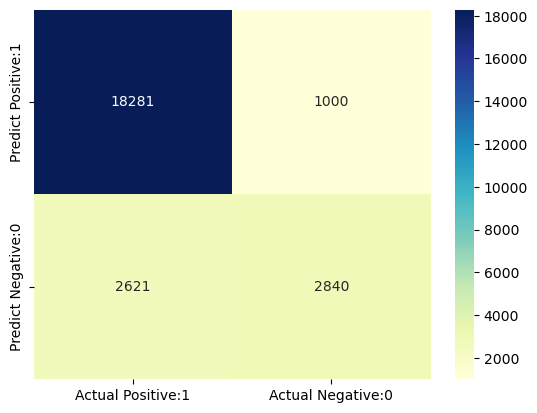

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification Report:
* Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     19281
         Yes       0.74      0.52      0.61      5461

    accuracy                           0.85     24742
   macro avg       0.81      0.73      0.76     24742
weighted avg       0.84      0.85      0.84     24742



In [ ]:
# Classification accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8536


In [ ]:
# Classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1464


Precision:

* Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. 
* It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [ ]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9481


Recall:
* Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. 
* It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). 
* Recall is also called Sensitivity.
* Recall identifies the proportion of correctly predicted actual positives.
* Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8746


True Positive Rate:
* True Positive Rate is synonymous with Recall.

In [ ]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8746


In [ ]:
# False Positive Rate

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2604


In [ ]:
# Specificity

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7396


f1-score:
* f1-score is the weighted harmonic mean of precision and recall. 
* The best possible f1-score would be **1.0** and the worst would be **0.0**. 
* f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. 
* The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [ ]:
# Support:
# Support is the actual number of occurrences of the class in our dataset.
y_test.value_counts()

RainTomorrow
No     19281
Yes     5461
Name: count, dtype: int64

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.95462293, 0.04537707],
       [0.96963134, 0.03036866],
       [0.94196015, 0.05803985],
       [0.9517319 , 0.0482681 ],
       [0.30636206, 0.69363794],
       [0.94616472, 0.05383528],
       [0.85220648, 0.14779352],
       [0.34975084, 0.65024916],
       [0.18476488, 0.81523512],
       [0.82356176, 0.17643824]])

Observations in each row,
* the numbers sum to 1. There are 2 columns which correspond to 2 classes - 0 and 1.
    * Class 0 - predicted probability that there is no rain tomorrow.
    * Class 1 - predicted probability that there is rain tomorrow.

Importance of predicted probabilities
* We can rank the observations by probability of rain or no rain. predict_proba process
* Predicts the probabilities
* Choose the class with the highest probability

Classification threshold level
* There is a classification threshold level of **0.5**.
    * Class 1 - probability of rain is predicted if **probability > 0.5**.
    * Class 0 - probability of no rain is predicted if **probability < 0.5**.

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.954623,0.045377
1,0.969631,0.030369
2,0.941960,0.058040
3,0.951732,0.048268
4,0.306362,0.693638
5,0.946165,0.053835
6,0.852206,0.147794
7,0.349751,0.650249
8,0.184765,0.815235
9,0.823562,0.176438


In [ ]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.04537707, 0.03036866, 0.05803985, 0.0482681 , 0.69363794,
       0.05383528, 0.14779352, 0.65024916, 0.81523512, 0.17643824])

In [ ]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

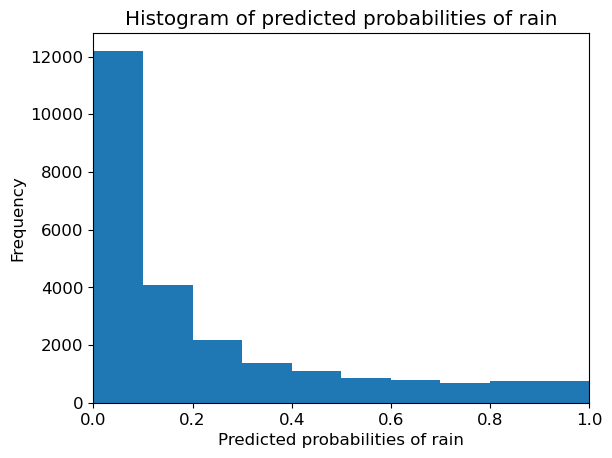

In [ ]:
# plot histogram of predicted probabilities

# adjust the font size
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

Observations:

* We can see that the above histogram is highly positive skewed.
* The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.
* There are small number of observations with probability > 0.5.
* So, these small number of observations predict that there will be rain tomorrow.
* Majority of observations predict that there will be no rain tomorrow.

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)

    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')

    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[11684  7597]
 [  469  4992]] 

 with 16676 correct predictions,  

 7597 Type I errors( False Positives),  

 469 Type II errors( False Negatives),  

 Accuracy score:  0.673995634952712 

 Sensitivity:  0.9141182933528658 

 Specificity:  0.6059851667444635 



With 0.2 threshold the Confusion Matrix is  

 [[15175  4106]
 [ 1080  4381]] 

 with 19556 correct predictions,  

 4106 Type I errors( False Positives),  

 1080 Type II errors( False Negatives),  

 Accuracy score:  0.790396895966373 

 Sensitivity:  0.8022340230726973 

 Specificity:  0.7870442404439604 



With 0.3 threshold the Confusion Matrix is  

 [[16795  2486]
 [ 1633  3828]] 

 with 20623 correct predictions,  

 2486 Type I errors( False Positives),  

 1633 Type II errors( False Negatives),  

 Accuracy score:  0.8335219464877536 

 Sensitivity:  0.7009705182201063 

 Specificity:  0.8710647787977802 



With 0.4 threshold the Confusion Matrix is  

 [[17679  1602]

* In binary problems, the threshold of **0.5** is used by default to convert predicted probabilities into class predictions.
* Threshold can be adjusted to increase sensitivity or specificity.
* Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.
* We can see that increasing the threshold level results in increased accuracy.
* Adjusting the threshold level should be one of the last step you do in the model-building process.

**ROC - AUC**
* Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. 
* An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.
* The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.
* True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).
* False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

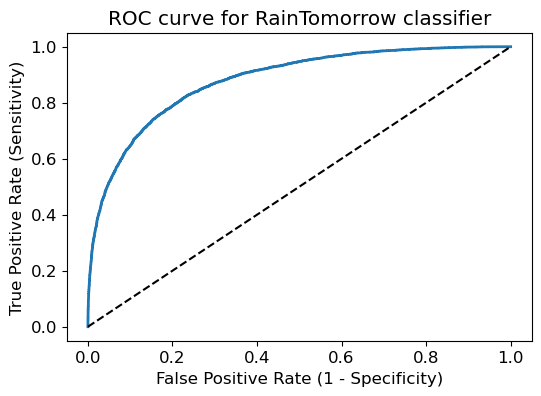

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

* ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.
* ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
* So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8789


* ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.
* ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

calculate cross-validated ROC AUC

In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8790


k-Fold Cross Validation

In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.85263211 0.85505709 0.85197535 0.8529278  0.85302885]


In [ ]:
# We can summarize the cross-validation accuracy by calculating its mean.
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8531


* Our, original model score is found to be **0.8476**. The average cross-validation score is **0.8474**. So, we can conclude that cross-validation does not result in performance improvement.

**Hyperparameter Optimization using GridSearch CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]


grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8538


Parameters that give the best results : 

 {'C': 1000}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=0, solver='liblinear')


In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8539


* Our original model test accuracy is **0.8501** while GridSearch CV accuracy is **0.8538**. We can see that GridSearch CV improve the performance for this particular model.

### Results and conclusion
* The logistic regression model accuracy score is **0.8501**. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.
* Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.
* The model shows no signs of overfitting.
* Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.
* Increasing the threshold level results in increased accuracy.
* ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.
* Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.
* In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.
* Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.
* Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.

### References:
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://en.wikipedia.org/wiki/Sigmoid_function

https://www.statisticssolutions.com/assumptions-of-logistic-regression/

https://en.wikipedia.org/wiki/Logistic_regression